# CLASSIFICATION AND REGRESSION TREE Example: 
A marketing company wants to optimize their mailing campaign by sending
the brochure mail only to those customers who responded to previous mail
campaigns. The profile of customers are given. Can you develop a rule to
identify the profile of customers who are likely to respond (Mail_Respond.csv)?

In [1]:
#Import the packages
import pandas as mypd
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
#Import the dataset
mydata=mypd.read_csv('D:/Python_ISI/data/Mail_Respond.csv')

In [3]:
#Explore the data
mydata.head()

,SLNo,District,House_Type,Income,Previous_Customer,Outcome
0,1,1,0,1,0,0
1,2,1,0,1,1,0
2,3,2,0,1,0,1
3,4,0,1,1,0,1
4,5,0,1,0,0,1


In [4]:
#Separate X's and Y
x=mydata.iloc[:,1:5]
y=mydata.Outcome

In [5]:
x.head()

,District,House_Type,Income,Previous_Customer
0,1,0,1,0
1,1,0,1,1
2,2,0,1,0
3,0,1,1,0
4,0,1,0,0


In [6]:
#Specify the initial model
mymodel=tree.DecisionTreeClassifier(min_samples_split=12)

In [7]:
#Fit the model to the data
mymodel=mymodel.fit(x,y)

In [8]:
#Model Accuracy
accuracy=mymodel.score(x,y)
round(accuracy*100,2)

100.0

In [9]:
#Validate the model- Cross Validation
mycv_accuracy=cross_val_score(mymodel,x,y,scoring='accuracy',cv=3)

In [10]:
mycv_accuracy

array([0.94117647, 0.93939394, 0.93939394])

In [11]:
cv_accuracy=mycv_accuracy.mean()
round(cv_accuracy*100,2)

94.0

In [12]:
#Hyper parameter tuning
#Set up parameter grid
myparam_grid=[{'criterion':['gini','entropy'],'min_samples_split':[2,5,8,10,12]}]

In [13]:
#Set up optimum search
mysearch=GridSearchCV(mymodel,param_grid=myparam_grid,scoring='accuracy',cv=5)

In [14]:
#Fit the search to the data
mysearch=mysearch.fit(x,y)

In [15]:
#Best parameter values
mysearch.best_params_

{'criterion': 'gini', 'min_samples_split': 2}

In [16]:
#Set the optimum model
mymodel=tree.DecisionTreeClassifier(criterion='gini',min_samples_split=2)

In [17]:
#Fit opt model to the data
mymodel=mymodel.fit(x,y)

In [18]:
#Model Accuracy
accuracy=mymodel.score(x,y)
accuracy

1.0

In [19]:
#Cross Validation Accuray
mycv_accuracy=cross_val_score(mymodel,x,y,scoring='accuracy',cv=3)

In [20]:
mycv_accuracy

array([1., 1., 1.])

In [21]:
#Display the model
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [22]:
#conda install graphviz

In [23]:
#pip install pydotplus

In [24]:
dot_data=StringIO()

In [25]:
x_names=x.columns

In [26]:
export_graphviz(mymodel,out_file=dot_data,feature_names=x_names,class_names=['0','1'],filled=True,special_characters=True)

In [27]:
mygraph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [28]:
mygraph.write('Mail_Respond.png')

True

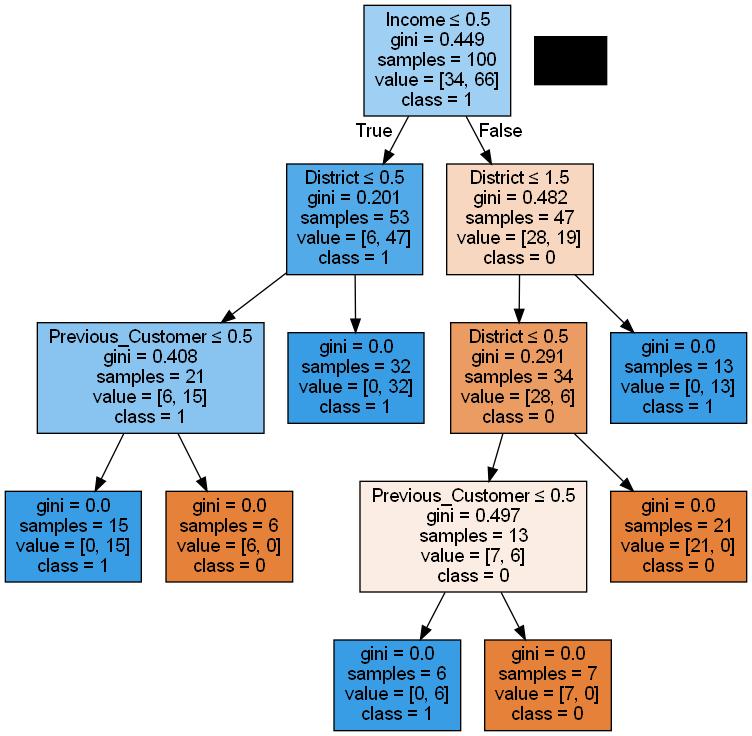

In [29]:
Image(mygraph.create_png())

In [30]:
#Predict the response
ypred=mymodel.predict(x)

In [31]:
#Actual vs Predicted
mytable=mypd.crosstab(y,ypred)

In [32]:
mytable

col_0,0,1
Outcome,,
0,34,0
1,0,66
